In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
dataset = pd.read_csv("insurance.csv")

<AxesSubplot:xlabel='sex', ylabel='charges'>

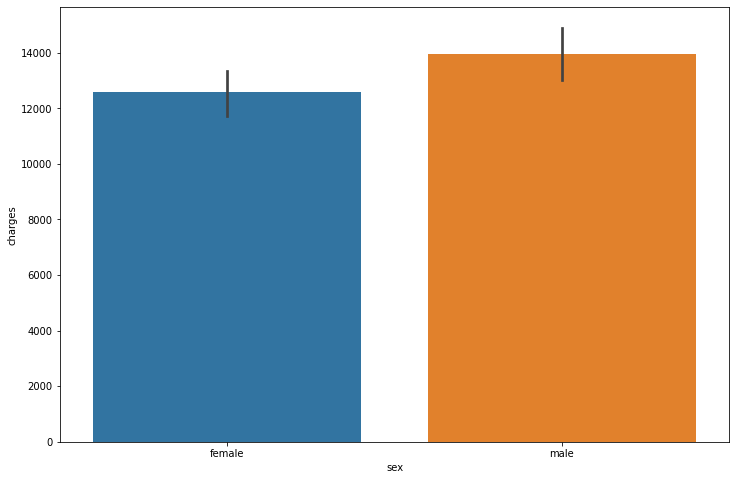

In [2]:
plt.figure(figsize = (12, 8))
sns.barplot(x = "sex", y = "charges", data = dataset)

<AxesSubplot:xlabel='age', ylabel='charges'>

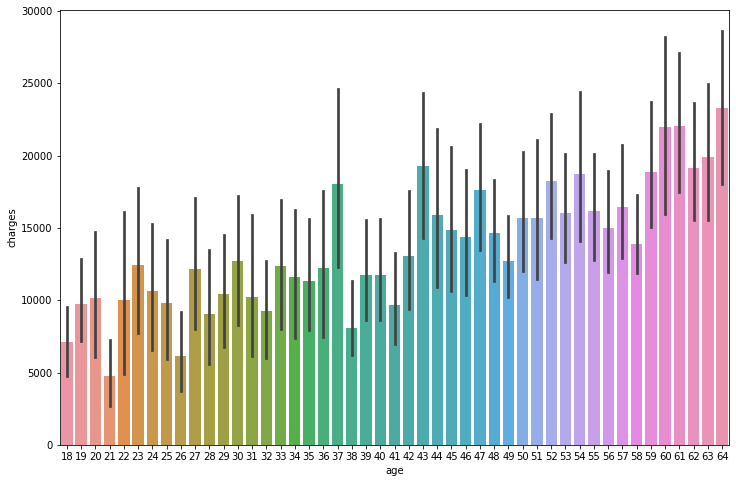

In [3]:
plt.figure(figsize = (12, 8))
sns.barplot(x = "age", y = "charges", data = dataset)

Text(0.5, 1.0, 'bmi vs Charges')

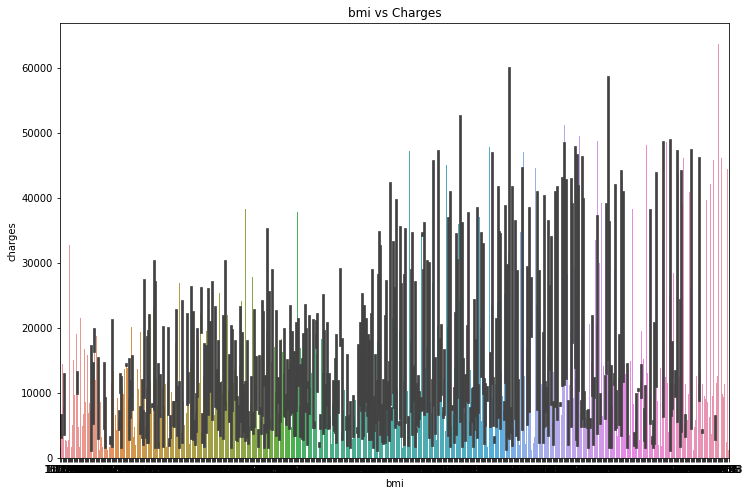

In [4]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'bmi', y = 'charges', data = dataset)

plt.title("bmi vs Charges")

Text(0.5, 1.0, 'children vs Charges')

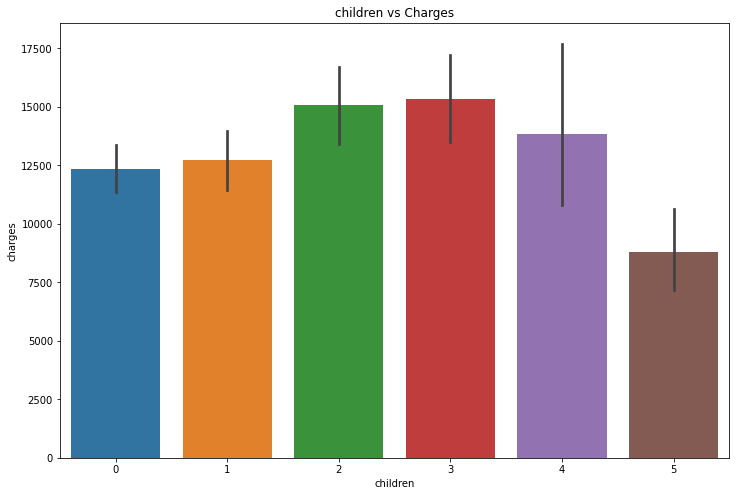

In [5]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'children', y = 'charges', data = dataset)

plt.title("children vs Charges")

Text(0.5, 1.0, 'Smoker vs Charges')

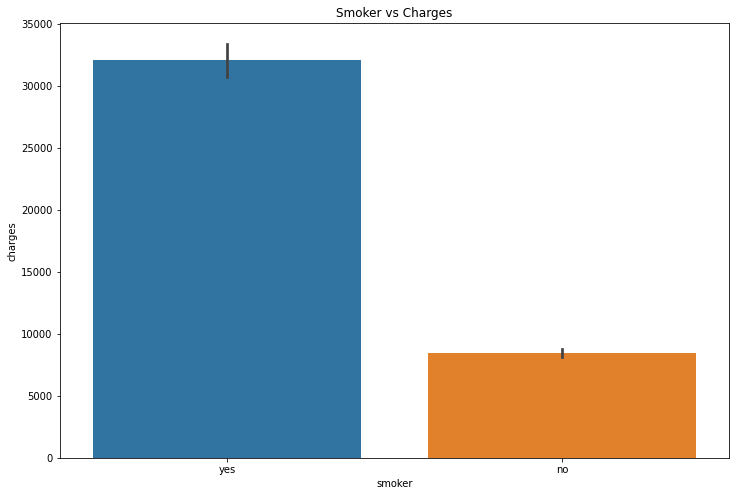

In [6]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'smoker', y = 'charges', data = dataset)

plt.title("Smoker vs Charges")

Text(0.5, 1.0, 'Region vs Charges')

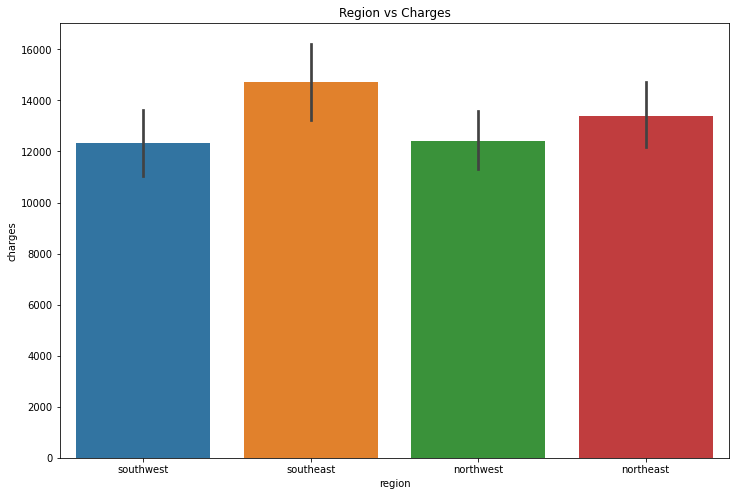

In [7]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'region', y = 'charges', data = dataset)

plt.title("Region vs Charges")

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


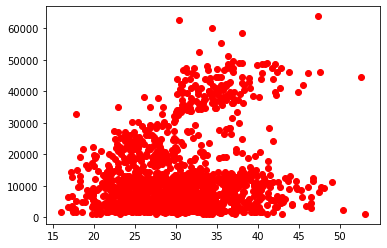

In [14]:
plt.scatter(dataset['bmi'],dataset['charges'],c='red')
plt.show()

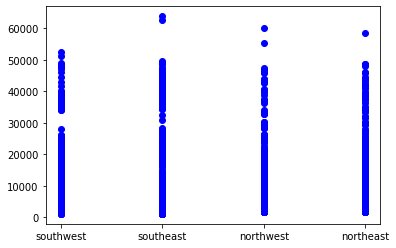

In [15]:
plt.scatter(dataset['region'],dataset['charges'],c='blue')
plt.show()

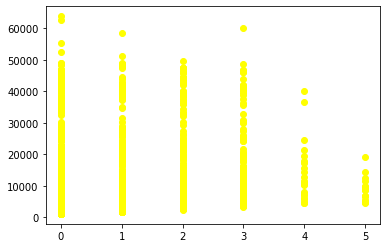

In [16]:
plt.scatter(dataset['children'],dataset['charges'],c='yellow')
plt.show()

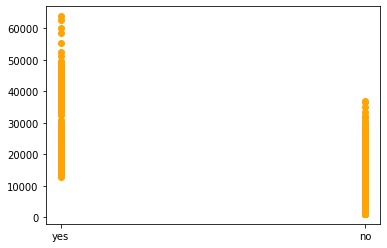

In [17]:
plt.scatter(dataset['smoker'],dataset['charges'],c='orange')
plt.show()

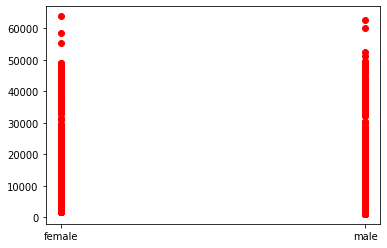

In [18]:
plt.scatter(dataset['sex'],dataset['charges'],c='red')
plt.show()

In [19]:
dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [20]:
x=dataset.drop(columns='charges',axis=1)
y=dataset['charges']

In [21]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [22]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [24]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [25]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [26]:
regressor.fit(x_train,y_train)

LinearRegression()

In [27]:
training_data_prediction=regressor.predict(x_train)

In [28]:
r2_train=metrics.r2_score(y_train,training_data_prediction)
print('R squared value:',r2_train)

R squared value: 0.751505643411174


In [29]:
test_data_prediction=regressor.predict(x_test)

In [30]:
r2_test=metrics.r2_score(y_test,test_data_prediction)
print('R squared value:',r2_test)

R squared value: 0.7447273869684077


In [31]:
input_data=(31,1,25.74,0,1,0)

input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=regressor.predict(input_data_reshaped)
print('The insurance cost is:',prediction[0])


The insurance cost is: 3760.0805764960514


In [32]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

# Predicting a new result
y_pred = regressor.predict(x_test)
regressor.score(x_train,y_train)

0.9683921635494519

In [37]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],
                    remainder='passthrough')
X=ct.fit_transform(X)
print(X)

[[ 1.    0.    0.   ... 27.9   0.    1.  ]
 [ 0.    1.    0.   ... 33.77  1.    0.  ]
 [ 0.    0.    0.   ... 33.    1.    0.  ]
 ...
 [ 1.    0.    0.   ... 36.85  1.    0.  ]
 [ 1.    0.    0.   ... 25.8   1.    1.  ]
 [ 1.    0.    0.   ... 29.07  0.    3.  ]]


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [43]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [44]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,-1].values
Y_pred=regressor.predict(X_test)
print(Y_pred)

[11314.55649519  9505.58891773 38360.58383815 16449.59640407
  7117.89379839  3625.40607824  1220.82286678 14546.23034668
  9175.38911418  7670.45320003  4137.50251413 10460.04576612
  8937.02424204  3821.65458782 28121.9236222  10727.21593537
 11492.35478865  5741.04672175  8414.69398732 26801.81210287
 33848.38568362 14527.74171334 11390.85379777 32180.53730024
  4178.01083124  8887.21190336   744.58537141  9803.59635122
  3791.46686472 10607.59311526  9175.47238397 40104.40338991
 15833.68613995 14020.43761781 24429.83851219  4812.11477907
 12615.54616137 30908.11622546 33731.94909917  3794.59535793
  3636.61843919  4007.71037332 30202.73392169 39695.63095105
 27824.21897431  5247.42299012 10616.83293985  8014.84064366
  3241.96543926 10245.23684269  5352.03102501  3581.85961167
 33183.50761881 38119.35302412 16065.17314482  6802.84856411
  5746.95388287  9648.87690851  8916.81736286 11924.15159482
  1990.53718952 39110.73276233 14914.40196206 11940.27650856
 13678.73000489 14182.22

In [45]:
Y_pred=regressor.predict(X_test)
print('Y_test          Y_pred')
print(np.append(arr=Y_test.reshape(len(Y_test),1),values=Y_pred.reshape(len(Y_pred),1),axis=1))

Y_test          Y_pred
[[ 9724.53       11314.55649519]
 [ 8547.6913      9505.58891773]
 [45702.02235    38360.58383815]
 [12950.0712     16449.59640407]
 [ 9644.2525      7117.89379839]
 [ 4500.33925     3625.40607824]
 [ 2198.18985     1220.82286678]
 [11436.73815    14546.23034668]
 [ 7537.1639      9175.38911418]
 [ 5425.02335     7670.45320003]
 [ 6753.038       4137.50251413]
 [10493.9458     10460.04576612]
 [ 7337.748       8937.02424204]
 [ 4185.0979      3821.65458782]
 [18310.742      28121.9236222 ]
 [10702.6424     10727.21593537]
 [12523.6048     11492.35478865]
 [ 3490.5491      5741.04672175]
 [ 6457.8434      8414.69398732]
 [33475.81715    26801.81210287]
 [23967.38305    33848.38568362]
 [12643.3778     14527.74171334]
 [23045.56616    11390.85379777]
 [23065.4207     32180.53730024]
 [ 1674.6323      4178.01083124]
 [ 4667.60765     8887.21190336]
 [ 3732.6251       744.58537141]
 [ 7682.67        9803.59635122]
 [ 3756.6216      3791.46686472]
 [ 8413.46305    106

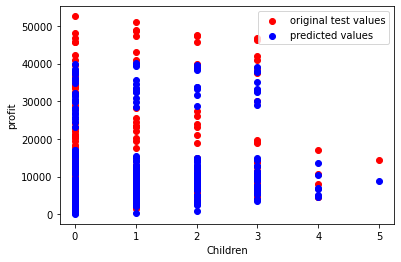

In [46]:
plt.scatter(X_test[:,3],Y_test,c='red',label='original test values')
plt.scatter(X_test[:,3],Y_pred,c='blue',label='predicted values')
plt.xlabel('Children')
plt.ylabel('profit')
plt.legend()
plt.show()

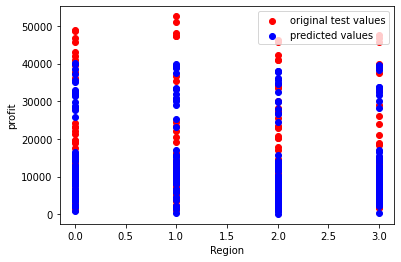

In [47]:
plt.scatter(X_test[:,5],Y_test,c='red',label='original test values')
plt.scatter(X_test[:,5],Y_pred,c='blue',label='predicted values')
plt.xlabel('Region')
plt.ylabel('profit')
plt.legend()
plt.show()

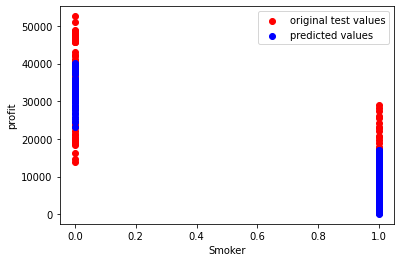

In [48]:
plt.scatter(X_test[:,4],Y_test,c='red',label='original test values')
plt.scatter(X_test[:,4],Y_pred,c='blue',label='predicted values')
plt.xlabel('Smoker')
plt.ylabel('profit')
plt.legend()
plt.show()

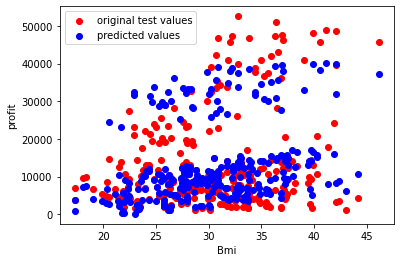

In [49]:
plt.scatter(X_test[:,2],Y_test,c='red',label='original test values')
plt.scatter(X_test[:,2],Y_pred,c='blue',label='predicted values')
plt.xlabel('Bmi')
plt.ylabel('profit')
plt.legend()
plt.show()

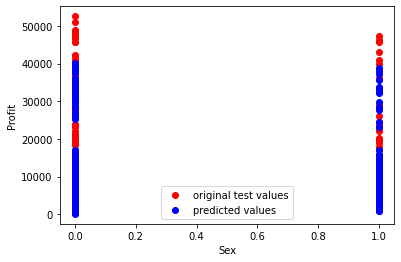

In [50]:
plt.scatter(X_test[:,1],Y_test,c='red',label='original test values')
plt.scatter(X_test[:,1],Y_pred,c='blue',label='predicted values')
plt.xlabel('Sex')
plt.ylabel('Profit')
plt.legend()
plt.show()

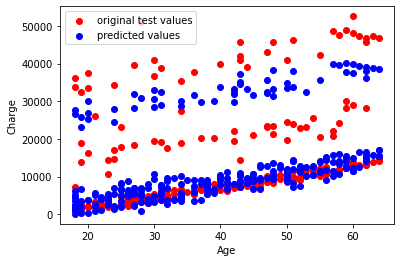

In [51]:
plt.scatter(X_test[:,0],Y_test,c='red',label='original test values')
plt.scatter(X_test[:,0],Y_pred,c='blue',label='predicted values')
plt.xlabel('Age')
plt.ylabel('Charge')
plt.legend()
plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
print(x)

[[ 1.15369426 -0.56526686 -0.46752458 ... -0.45332    -1.97058663
  -0.40328924]
 [-0.86678077  1.76907593 -0.46752458 ...  0.5096211   0.5074631
  -1.28788104]
 [-0.86678077 -0.56526686 -0.46752458 ...  0.38330685  0.5074631
  -1.28788104]
 ...
 [ 1.15369426 -0.56526686 -0.46752458 ...  1.0148781   0.5074631
  -1.28788104]
 [ 1.15369426 -0.56526686 -0.46752458 ... -0.79781341  0.5074631
  -0.40328924]
 [ 1.15369426 -0.56526686 -0.46752458 ... -0.26138796 -1.97058663
   1.36589436]]


In [53]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x=pca.fit_transform(x)
print(pca.explained_variance_ratio_)

[0.14059881 0.11767872]


In [54]:
print(x)

[[ 1.5813796  -0.03454926]
 [-1.25984175  1.13434167]
 [-0.76964614  0.50227521]
 ...
 [ 1.51244551  1.22593505]
 [ 1.63535552 -0.54021901]
 [ 1.27627388 -0.60648984]]


In [56]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

# fitting
scalar.fit(dataset)
scaled_data = scalar.transform(dataset)

# Importing PCA
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

x_pca.shape


(1338, 2)

Text(0, 0.5, 'Charges')

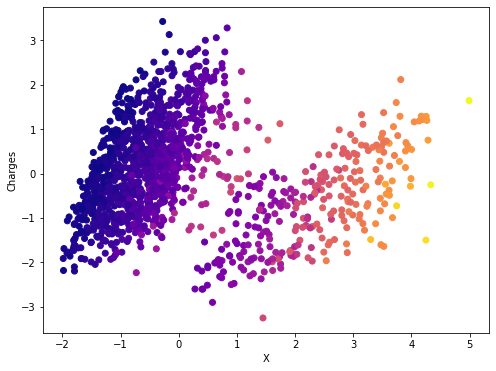

In [58]:
plt.figure(figsize =(8, 6))

plt.scatter(x_pca[:, 0], x_pca[:, 1], c = dataset['charges'], cmap ='plasma')

# labeling x and y axes
plt.xlabel('X')
plt.ylabel('Charges')